In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image

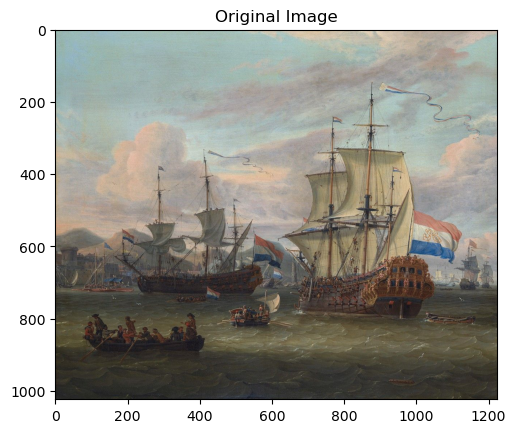

In [6]:
ship_image = image.imread("ships.jpg")

plt.title("Original Image")
plt.imshow(ship_image)
plt.show()

In [16]:
# define image dimensions
p_x_max = ship_image.shape[1]
p_y_max = ship_image.shape[0]

# define part of the complex plane that should be shown
c_x_min, c_x_max = -1.0, 1.0
c_y_min, c_y_max = -1.0, 1.0

def pixel_to_complex(pixel_position):
    p_y, p_x = pixel_position
    
    # right pixels = high real parts
    alpha = p_x / p_x_max
    real_part = (1 - alpha) * c_x_min + alpha * c_x_max
    
    # top pixels = high imaginary parts
    beta = p_y / p_y_max
    imaginary_part = beta * c_y_min + (1 - beta) * c_y_max
    
    return real_part + imaginary_part * 1j

In [45]:
# z is a complex number
def complex_to_pixel(z):
    real_part = np.real(z)
    im_part = np.imag(z)
    
    alpha = (real_part - c_x_min) / (c_x_max - c_x_min)
    p_x = int(alpha * p_x_max)
    p_x = np.clip(p_x, 0, p_x_max - 1)
    
    beta = (im_part - c_y_min) / (c_y_max - c_y_min)
    p_y = int((1 - beta) * p_y_max)
    p_y = np.clip(p_y, 0, p_y_max - 1)
    
    return (p_y, p_x)

In [46]:
c_positions = np.zeros(ship_image.shape[:2], dtype=complex)

for y in range(len(pixel_positions)):
    for x in range(len(pixel_positions[0])):
        c_positions[y, x] = pixel_to_complex((y, x))
        
print(c_positions)

[[-1.        +1.j         -0.99836735+1.j         -0.99673469+1.j
  ...  0.99510204+1.j          0.99673469+1.j
   0.99836735+1.j        ]
 [-1.        +0.99804688j -0.99836735+0.99804688j -0.99673469+0.99804688j
  ...  0.99510204+0.99804688j  0.99673469+0.99804688j
   0.99836735+0.99804688j]
 [-1.        +0.99609375j -0.99836735+0.99609375j -0.99673469+0.99609375j
  ...  0.99510204+0.99609375j  0.99673469+0.99609375j
   0.99836735+0.99609375j]
 ...
 [-1.        -0.99414062j -0.99836735-0.99414062j -0.99673469-0.99414062j
  ...  0.99510204-0.99414062j  0.99673469-0.99414062j
   0.99836735-0.99414062j]
 [-1.        -0.99609375j -0.99836735-0.99609375j -0.99673469-0.99609375j
  ...  0.99510204-0.99609375j  0.99673469-0.99609375j
   0.99836735-0.99609375j]
 [-1.        -0.99804688j -0.99836735-0.99804688j -0.99673469-0.99804688j
  ...  0.99510204-0.99804688j  0.99673469-0.99804688j
   0.99836735-0.99804688j]]


In [53]:
def get_transformed_image(positions):
    
    transformed_image = np.zeros(ship_image.shape, dtype=int)

    for y in range(p_y_max):
        for x in range(p_x_max):
            pixel_pos = complex_to_pixel(positions[y, x])
            transformed_image[y, x] = ship_image[pixel_pos[0], pixel_pos[1]]
            
    return transformed_image

In [60]:
def plot_transform(f, title="Transformed Image"):
    c_positions_after_f = f(c_positions)
    transformed_image = get_transformed_image(c_positions_after_f)

    plt.title(title)
    plt.imshow(transformed_image)
    plt.show()

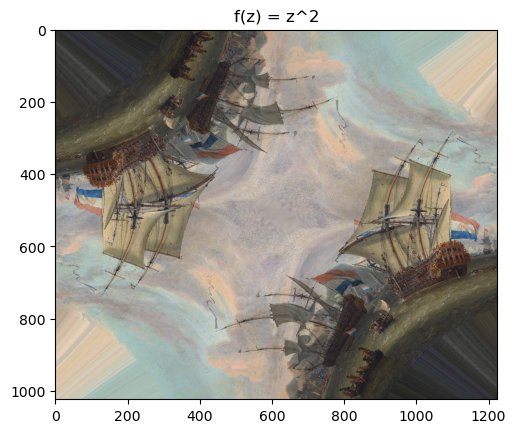

In [61]:
plot_transform(lambda z : z * z, title="f(z) = z^2")

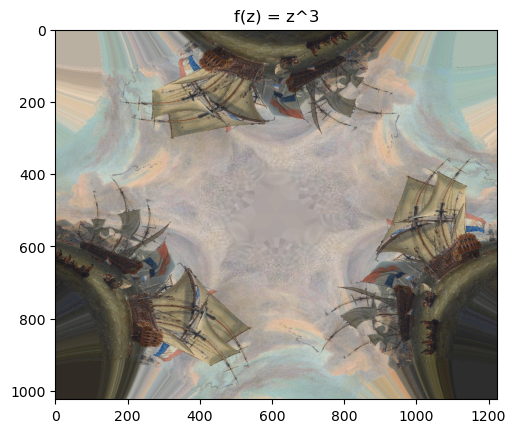

In [73]:
plot_transform(lambda z : z**3, title="f(z) = z^3")

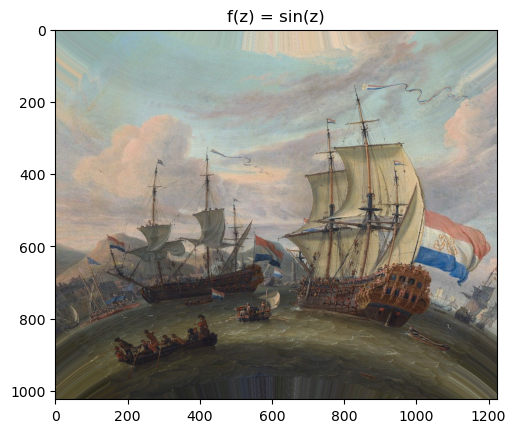

In [62]:
plot_transform(lambda z : np.sin(z), "f(z) = sin(z)")

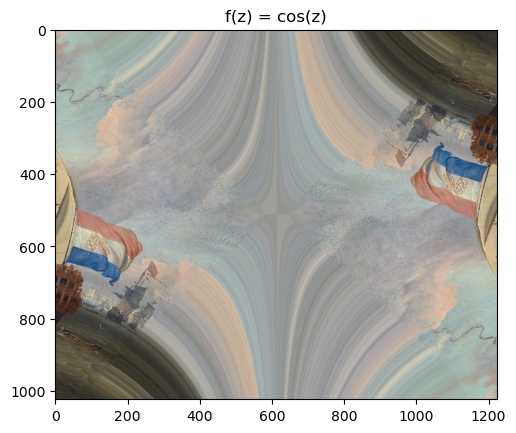

In [72]:
plot_transform(lambda z : np.cos(z), "f(z) = cos(z)")

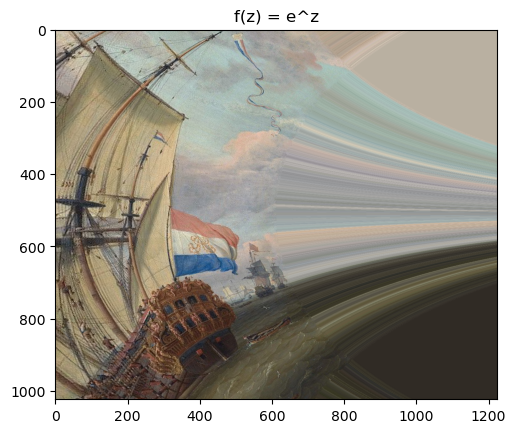

In [63]:
plot_transform(lambda z : np.exp(z), "f(z) = e^z")

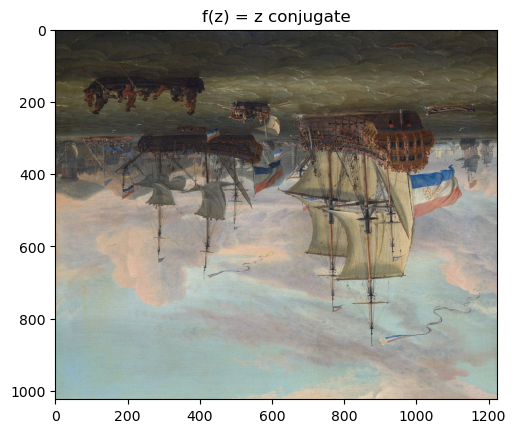

In [64]:
plot_transform(lambda z : np.conj(z), "f(z) = z conjugate")

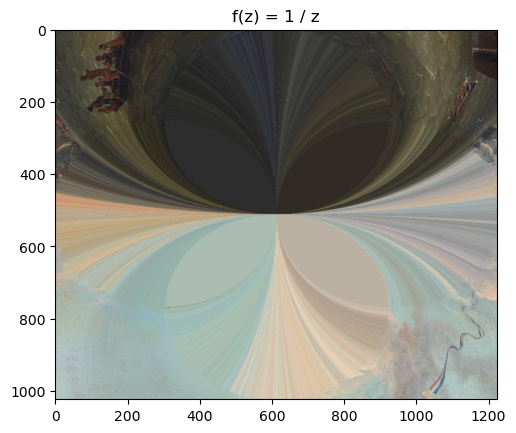

In [69]:
plot_transform((lambda z : 1.0 / z), "f(z) = 1 / z")

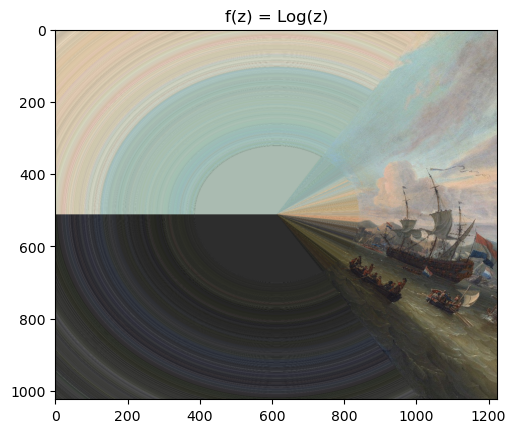

In [71]:
plot_transform(lambda z: np.log(z), "f(z) = Log(z)")

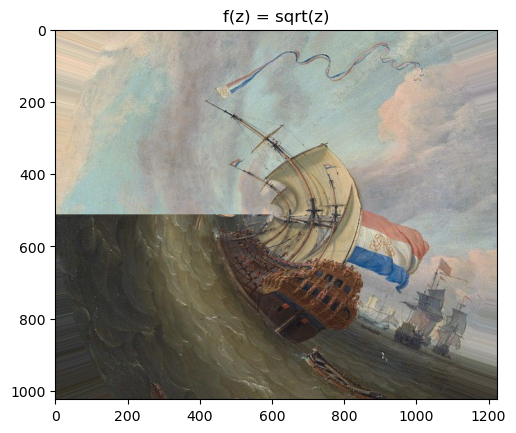

In [74]:
plot_transform(lambda z : np.sqrt(z), "f(z) = sqrt(z)") 